# Physical Considerations for the Freefall in Freediving

Author: Marc Pfander  
Date: 17.02.2022

For the understanding of this paper, it is assumed that the reader is familiar with freediving theory as it is described in freediving manuals such as [[0]](#0), [[1]](#1) and [[2]](#2). Also, an understanding of basic physics and mathematics is needed. To fully understand how some of the solutions are derived, knowledge about ordinary differential equations and how to find numerical solutions thereof is required as well. 

The calculations are made in python [[7]](#) with the use of the scientific computation library SciPy [[8]](#8). 

The source code for this document can be found here [[12]](#12).

## 1. Introduction

Freefall is an important part of any deep dive and there seem to be diverging opinions and theories as to when and how the freefall should be initiated. In the manuals of AIDA it is written that "... you need to find this depth on your own" [[2]](#2), which is not very helpful for that purpose. This paper tries to give a physics perspective on that topic considering the different forces that affect the diver during freefall. 

We will look at a diver moving during freefall and investigate how he is affected by different physical effects such as buoyancy, gravitation and hydrodynamic drag. The latter is a complex phenomenon and therefore we will only use an approximation of that effect. Other than that we will also make a number of assumptions and simplifications to reduce the problem at hand to something manageable in the scope of this paper. We will only look at the freefall itself and make a simple assumption on how the diver gets to the freefall starting point.

In the second chapter we will derive the relevant physical formulas to describe the movement of the diver during freefall. This chapter can be skipped for mathematically and physicaly less inclinded readers. In the third chapter we will apply the derived calculations to a fictional example of an average diver to see how different starting depths and velocities will affect their freefall. We will also interpret the formulas and try to build an intuition for the forces at play.

## 2. Physical and mathematical derivations

### 2.1 Coordinate system

We use a one-dimensional coordinate system where depth increases when we go down. Therefore we define the value of any force, velocity and acceleration vectors that point downwards as positive and vice versa for vectors pointing up.

### 2.2 Gravitation

At any given moment the diver experiences a gravitational force which is given by

$ F_G = m g $

where  
* $g$ is the gravitational acceleration  
* $m$ is the mass of the diver

Possible variations in $g$ and $m$ are extremely small and their calculation far beyond the scope of this paper. We will therefore treat both as constant values.

### 2.3 Buoyancy

#### Archimedes' principle
According to Archimedes principle the buoyant force of an object submerged in a fluid is equal to the gravitational force of the displaced water [[9]](#). This can be expressed as

$  F_B = - \rho g V $

where  
* $\rho$ is the density of the fluid  
* $V$ is the volume of the object

Buoyancy is pulling the diver towards the surface and this gives the buoyant force a negative value as mentioned above.

In our case the fluid is saline water. The change in its density from the surface to a diveable depth is around $\frac{1}{1000}$ of its value [[3]](#3). This will not have a significant effect on our calculations and therefore we will treat it as a constant.

#### Buoyancy with variable pressure

The total volume of the diver is subject to change due to the compression of air contained in the lungs and other spaces under pressure. Boyle's law states that the volume of a gas is proportional to the inverse of the surrounding pressure [[10]](#10). 

$ V \propto \frac{1}{P} $

For the air-filled spaces of a diver at a specific depth this can also be written as

$ \frac{V}{V_{surface}} = \frac{P_{surface}}{P} $

Due to the relationship between pressure and depth [[0]](#0)

$ P_{atm} = \frac{d}{10\frac{[m]}{[atm]}} + 1 [atm] $

where  
$P_{atm}$ is the pressure at a specific depth in [atm]  
$d$ is the depth in [m]

the pressure ratio can also be expressed as

$ \frac{P_{surface}}{P} =   \frac{ 1  }{  \frac{d}{10[m]} + 1 }   = \frac{10 [m]}{d + 10[m]}$ 


With this we can then express the volume at depth as a function of that depth as
 

$ V = V_{surface} \frac{10 [m]}{d + 10[m]}  $

#### Constant and variable buoyancy

A diver is made of compressable and non-compressable parts and therefore there is a variable and a constant component in their buoyancy. Assuming that the diver starts a dive at the surface after a full inhale, the Volume at a specific depth is given by

$ V = V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} $

where  
* $V_{diver}$ is the volume of the diver without any gas-filled spaces  
* $V_{tlc}$ is the total lung capacity ($V_{surface}$) 

Note that other volumes of air are small compared to the total lung capacity and are therefore neglected.

Using this we can express the total buoyant force of the diver as

$ F_B = - C_B \left( V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} \right)$

with $C_B = \rho g$ being the constant buoyancy coefficient

The negative sign comes again from the use of the inverted coordinate system.

### 2.4 Hydrodynamic drag

Hydrodynamic drag is the resistive force that an object experiences when moving in a fluid. It can be approximated with the following formula which integrates different contributions such as turbulent and laminar drag [[4]](#4).

$ F_D = - \frac{1}{2} \rho v²C_D A $

where  
* $F_{D}$ is the drag force    
* $v$ is the speed of the object relative to the fluid  
* $A$ is the cross-sectional area  
* $C_{D}$ is the drag coefficient – a dimensionless number 

As above the negative sign comes from the inverted coordinate system

In our case the object is a diver during the descent on a deep dive. In reality changes in body position during freefall and the motion during swimming would affect the cross-sectional area and the drag coefficient of the diver [[2]](#2). However, including these changes would make the model unnecesarily complicated and would presumably not contribute to the general understanding of the problem at hand. Therefore these two factors are assumed to remain constant. 

Since the diver can theoretically move up and down, we have to express the square of the velocity as $v|v|$ so that its sign is retained. 

With these assumptions, modifications, and the constant density of water it is possible to simplify the above formula to

$ F_D = - C_R v |v| $

with $ C_R = \frac{1}{2} \rho C_D A$ being the constant resistive coefficient. 


### 2.5 Terminal velocity

A static object falling in a fluid will accelerate or decelerate until the gravitational and hydrodynamic forces cancel each other out. The velocity at that point is called terminal velocity [[6]](#6). If the object falls initially faster, the drag component will be larger than the gravitational force and therefore the object will slow down. If the object is initially slower, the gravitational force is greater and it will accelerate.

In our case the terminal velocity for the diver can be derived from the force equation

$  F_G = F_B + F_D  $

and thus

$ m g = - C_B \left( V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} \right) - C_R v |v| $


Solving this for $v$ then results in the terminal velocity that a diver in freefall should converge to

$  v_t =  \sqrt{  \frac{ \left| m g  - C_B \left( V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} \right) \right|}{C_R}  }   $

Due to the variable lung volume, the terminal velocity is actually dependent on depth and thus not constant. However, as a first approximation we can assume that the lung volume converges towards 0m² at greater depth and therefore becomes neglibile. For that case we can ignore the term $ V_{tlc} \frac{10 [m]}{d + 10[m]} $ and write the equation as

$  v_T =  \sqrt{ \frac{ \left|- C_B V_{diver} - m g \right|}{C_R}}   $

### 2.5 Freefall equation

With the derivations from the previous sections we can now express the force that a diver during freefall experiences as the sum of the hydrodynamic drag, the buoyant force and the gravitational force.

$ F_{total} = F_B + F_G + F_D = m g - C_B \left( V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} \right) - C_R v |v|$

Expressing the total force as the product of mass and total acceleration gives 

$ m a = m g - C_B \left( V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} \right)  - C_R v |v|$

Since acceleration and velocity are derivatives with respect to time ( $v(t)=\frac{d d}{d t} = d'$,  $a(t)=\frac{d² d}{d t²} = d''$ ),  we can rewrite this as a differential equation.

$ m d'' = - C_R (d')² - C_B V_{tlc} \frac{10 [m]}{d + 10[m]} - C_B V_{diver} + mg $


The solution to this differential equation is not trivial and therefore a numerical solver will be used. For this we need to transform the second order differential equation into a system of two first order ones. We define 

$ d' = v $  
$ v' = d'' = \frac{ - C_R v |v| -  C_B V_{tlc} \frac{10 [m]}{d + 10[m]} - C_B V_{diver} + m g }{m}$

These are two coupled first order differential equations which require inittial conditions ($d_0$ and $v_0$).


## 3 Example and interpretation

In the previous chapter we concluded that the forces during freefall can be described as the sum of the buoyant force, gravitational force and hydrodynamic drag. We will now look at the individual components and visualize them with the help of an example to create an intuition of how they work.

In [1]:
# Imports and setup
from enum import Enum
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import pandas as pd

### 3.1 Model diver and physical constants

Our model diver is assumed to have more or less average physical properties [[2]](#2)[[4]](#4)[[5]](#5)[[11]](#11).

In [2]:
# Physical constants
rho = 1023.6               # kg/m³ density of saline water
g = 9.807                  # m/s²  gravitational acceleration on earth

# Assumptions about diver
V_diver = 0.062            # m³    volume of diver   source [11]
V_tlc = 0.006              # m³    total lung capacity  source [2]
m_diver = 63               # Kg    weight of diver
m_weight = 3               # Kg    Extra weight for buoyancy control
A = 0.07                   # m²    crossectional area of diver in diving direction   source: [5]
C_D = 0.3                  # -     Drag coefficient   source: [4]

# Derived
m = m_diver + m_weight     # total diver mass
C_B = rho * g              # Buoyency coefficient
C_R = 0.5 * rho * C_D * A  # Resistive coefficient

### 3.2 Gravitation

The gravitational force is defined as

$ F_G = m g  $

There is no dependency on a variable component and therefore we expect this force to be constant at all times.

In [3]:
# functions
def gravitational_force(d):
    return m*g

# plot values
def plot_gravitation():
    depth = np.linspace(0, 100, 100)
    f_gravitation = [gravitational_force(d) for d in depth]

    # Plot
    plt_gravitational = sns.lineplot(x = depth, y = f_gravitation, label='gravitation', color='purple')
    plt_gravitational.axhline(0, ls='--', color='gray');
    plt_gravitational.set(xlabel='depth [m]', ylabel='Force [Kg m/s²]', title='gravitational force on diver');

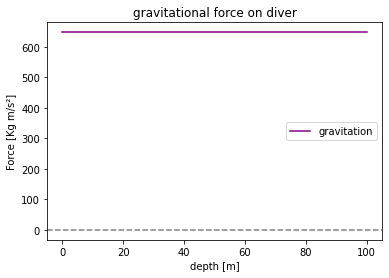

In [4]:
plot_gravitation()

### 3.3 Buoyant force

The buoyant force is defined as

$ F_B = - C_B \left( V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} \right)$

This can also be split up into the sum of a constant component for the non-compressible parts of the diver and a variable component for the airfilled spaces.

$ F_B = \underbrace{- C_B V_{diver}}_{constant} - \underbrace{C_B V_{tlc} \frac{10 [m]}{d + 10[m]}}_{variable} )$

With increasing depth the contribution of the variable part will decrease since the lung volume is shrinking. We can therefore expect for the total buoyant force to converge slowly towards the constant component.

In [5]:
# functions
def buoyant_force_constant(d):
    return - C_B * V_diver

def buoyant_force_variable(d):
    return - C_B * (V_tlc * 10 / ( d + 10))

def buoyant_force_total(d):    
    return buoyant_force_constant(d) + buoyant_force_variable(d)

def plot_buoyant_force():
    # plot values
    depth = np.linspace(0, 100, 100)
    f_buoyant_constant = [buoyant_force_constant(d) for d in depth]
    f_buoyant_variable = [buoyant_force_variable(d) for d in depth]
    f_buoyant_total = [buoyant_force_total(d) for d in depth]

    # Plot
    plt_buoyant = sns.lineplot(x = depth, y = f_buoyant_constant, label='buoyant constant', color='lightblue')
    plt_buoyant = sns.lineplot(x = depth, y = f_buoyant_variable, label='buoyant variable', color='turquoise')
    plt_buoyant = sns.lineplot(x = depth, y = f_buoyant_total, label='buoyant total', color='blue')
    plt_buoyant.axhline(0, ls='--', color='grey');
    plt_buoyant.set(xlabel='depth [m]', ylabel='Force [Kg m/s²]', title='buoyant forces on diver');

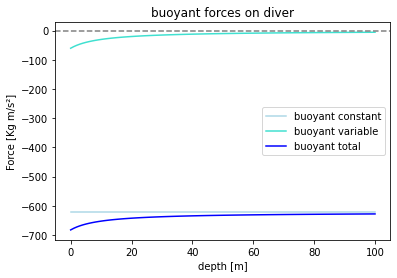

In [6]:
plot_buoyant_force()

### 3.4 Static forces (buoyancy and gravitation)

The total of forces that don't depend on the movement of the diver are the sum of the gravitational and buoyant forces.

$ F_{static} = F_B + F_G = \underbrace{ - C_B \left( V_{diver} + V_{tlc} \frac{d + 10[m]}{10 [m]} \right)}_\text{buoyant}  + \underbrace{mg}_\text{gravitation} $

The only variable part is the contribution of the variable buoyant force. We can therefore expect the same curve as for the buoyant force just with the gravitational force added. The point where the total static force reaches zero is the divers neutral depth.

In [7]:
# functions
def static_forces_total(d):
    return gravitational_force(d) + buoyant_force_total(d)

def plot_static_forces():
    # plot values
    depth = np.linspace(0, 100, 100)
    f_gravitation = [gravitational_force(d) for d in depth]
    f_static_total = [static_forces_total(d) for d in depth]
    f_buoyant_total = [buoyant_force_total(d) for d in depth]

    # neutral depth
    min_positive_buoyancy = min([f for f in f_static_total if f > 0])
    neutral_depth = depth[f_static_total.index(min_positive_buoyancy)]
    neutral_depth_text = f'neutral depth: {round(neutral_depth, 2)} [m]'

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    sns.lineplot(ax= ax1, x = depth, y = f_gravitation, label='gravitation', color='purple')
    sns.lineplot(ax= ax1, x = depth, y = f_buoyant_total, label='buoyant total', color='blue')
    sns.lineplot(ax= ax1, x = depth, y = f_static_total, label='static total', color='green')
    ax1.axhline(0, ls='--', color='grey');
    ax1.set(xlabel='depth [m]', ylabel='Force [Kg m/s²]', title='static forces on diver');

    sns.lineplot(ax= ax2, x = depth, y = f_static_total, label='static total', color='green')
    ax2.axhline(0, ls='--', color='grey');
    ax2.set(xlabel='depth [m]', ylabel='Force [Kg m/s²]', title='total static force on diver adn neutral depth');
    ax2.axvline(neutral_depth, ls='--', color='orange');
    ax2.text(neutral_depth + 2, - 4, neutral_depth_text, ha='left', va='bottom');

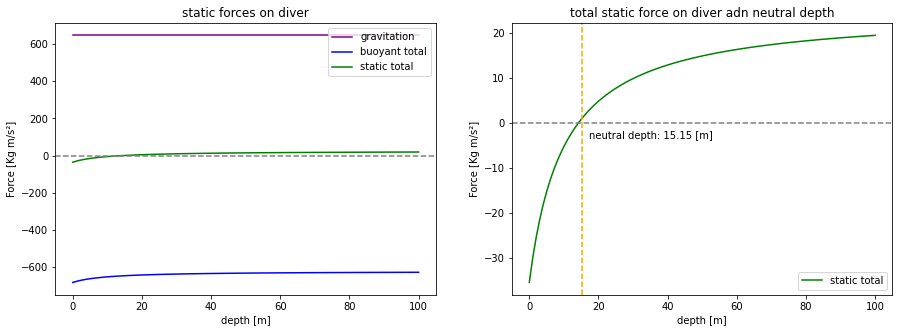

In [8]:
plot_static_forces()

### 3.5 Hydrodynamic drag

The hydrodynamic drag force is described by

$ F_D = - C_R v |v| $

with $ C_R = \frac{1}{2} \rho C_D A$ being the constant resistive coefficient.

On first sight, the hydrodynamic drag is solely dependent on the velocity of the diver during freefall. It increases quadraticaly with the velocity and thus doesn't play much of a role at slow velocities but becomes a major factor at higher ones. However the resistive coefficient $C_R$  can be influenced. The area $A$ is determined by body position and aligment during freefall and can therefore be optimized [[1]](#1). The drag coefficient $C_D$ depends on the overall shape of the diver and also on the smoothness of their wetsuit or skin [[0]](#0).

In our example we will however assume that the diver maintains a constant body position and alignment and that they don't experiment with different wetsuits.

In [9]:
# function
def drag_force(v):
    return - C_R * v * abs(v)

def plot_drag():
    # values
    velocity = np.linspace(0, 2, 100)
    f_drag = [drag_force(v) for v in velocity]

    # Plot
    plt_drag = sns.lineplot(x = velocity, y = f_drag, label='hydrodynamic drag', color='red')
    plt_drag.set(xlabel='velocity [m/s]', ylabel='Force [Kg m/s²]', title='hydrodynamic drag force on diver');

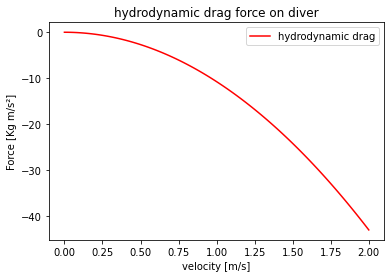

In [10]:
plot_drag()

### 3.6 Terminal velocity

The terminal velocity is given by

$  v_t =  \sqrt{ \frac{ m g - C_B \left( V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} \right) }{C_R} }   $

and at greater depths, when the lung volume becomes very small, it converges towards

$  v_T =  \sqrt{ \frac{m g - C_B V_{diver}}{C_R} }   $

The terminal velocity is the velocity a diver will approach during freefall without any active movement. If the diver is faster than the terminal velocity, they will slow down because the hydrodynamic drag is greater than the sum of gravitation and buoyancy. If they are slower however, they will speed up, because hydrodynamic drag is lower than the other forces.

Once the diver has passed neutral depth, we can see that the terminal velocity starts at 0 and converges then to a final value with increasing depth. Above neutral depth, the terminal velocity is negative due to the increased buoyancy. This is not relevant for the freefall and we will not discuss it further here.

This means for the diver, that they will have to actively swim down, as long as they want to move faster than the terminal velocity. As soon as they stop finning/swimming, their velocity will decrease quickly towards the terminal velocity at their current depth.

In [11]:
# functions
def terminal_velocity(d):
    v_square = ( m * g - C_B * ( V_diver + V_tlc * 10 /  (d + 10) ) ) / C_R 
    
    return v_square / abs(v_square) * abs(v_square) ** 0.5
    
terminal_velocity_final = math.sqrt( ( m * g - C_B * V_diver ) / (C_R) )

def plot_terminal_velocity():
    # specific terminal velocities

    # plot values
    depth = np.linspace(0, 100, 1000)
    v_terminal_depth = [terminal_velocity(d) for d in depth]

    # plot
    ax1 = sns.lineplot(x=depth, y=v_terminal_depth, label='terminal velocity')
    ax1.axhline(terminal_velocity_final, ls='--', color='orange');
    ax1.text(20, terminal_velocity_final, f'final terminal velocity: {round(terminal_velocity_final, 2)} m/s', ha='left', va='top');
    ax1.axhline(0, ls='--', color='grey');
    ax1.set(xlabel='depth [m]', ylabel='velocity [m/s²]', title='terminal velocity');

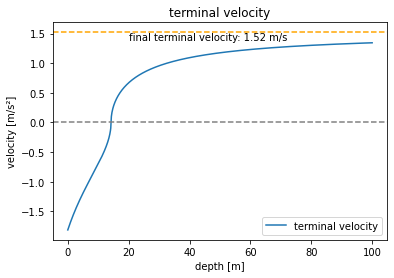

In [12]:
plot_terminal_velocity()

### 3.7 Freefall equation

The total sum of the static buoyant and gravitational forces and the hydrodynamic drag force is given by

$ F_{total} = F_B + F_G + F_D = m g - C_B \left( V_{diver} + V_{tlc} \frac{10 [m]}{d + 10[m]} \right) - C_R v |v|$

If this total force is negative, the diver will slow down, if it is positive, the diver will accelerate their dive (remember that we defined that negative forces pull up, positive forces pull down). If the force is zero, the diver will maintain their velocity.

Aside from adjusting their body position, alignment, and reducing friction, the diver has only two ways of influencing the freefall. One is the depth at which they stop finning/swimming and the other is the velocity with which they enter the freefall. This is described with

$ d' = v $  
$ v' = d'' = \frac{ - C_R v |v| -  C_B V_{tlc} \frac{10 [m]}{d + 10[m]} - C_B V_{diver} + m g }{m}$

with  
* $d_0 = \text{start depth}$  
* $v_0 = \text{initial velocity}$


Using this we will now simulate how different start depths and velocities will affect the descent of the diver. For simplicity we will assume that the diver finns/swims down to the freefall starting depth with constant velocity, which is also the velocity with which they will start the freefall.

In [13]:
# total force function
def total_forces(d, v):
    return - C_R * abs(v) * v  -  C_B * V_tlc * 10 / ( d + 10)  -  C_B * V_diver  +  m * g


# equation system
def dSdd(t, S):
    d, v = S
    return [
        v,
        total_forces(d, v) / m
    ]

# time
t = np.linspace(0, 120, 1000)


# initial conditions for different scenarios (d_0: depth, v_0: velocity)
class Scenario:
    
    def __init__(self, name, start_depth, start_velocity):
        self.name = name
        self.start_depth = start_depth
        self.start_velocity = start_velocity
        
    def get_time_to_start(self):
        return self.start_depth / self.start_velocity
        
v_fast, v_slow = [1.4, 0.8]
d_deep, d_shallow = [30, 20]

scenarios = {
    Scenario('shallow-fast', d_shallow, v_fast),
    # Scenario('shallow-terminal', d_shallow, terminal_velocity(d_shallow)),
    Scenario('shallow-slow', d_shallow, v_slow),    
    Scenario('deep-fast', d_deep, v_fast),
    # Scenario('deep-terminal', d_deep, terminal_velocity(d_deep)),
    Scenario('deep-slow', d_deep, v_slow),   
}

sample_depths = [40, 80, 120]

class Solution:    
    def __init__(self, scenario, t, d, v):
        self.scenario = scenario
        self.t = t
        self.d = d
        self.v = v
        
    def get_time_to_bottom(self, bottom_depth):
        i = np.where(self.d >= bottom_depth)[0][0]
        return self.t[i]        
        

# solver functions
def solve_scenario(equations, t, scenario):
    init = [scenario.start_depth, scenario.start_velocity]
    result = odeint(equations, y0 = init, t=t, tfirst=True)
    d = result.T[0]
    v = result.T[1]
    return d, v     
    
def solve_scenarios(equations, t, scenarios):
    solutions = []
    for s in scenarios:
        d, v = solve_scenario(equations, t, s)
        solutions.append(Solution(s, t, d, v))                         
    return solutions


# Execute
solutions = solve_scenarios(dSdd, t, scenarios);

In [14]:
# Plotting 
def get_line_stroke(scenario_name: str):
    if 'fast' in scenario_name:
        return '-'
    if 'terminal' in scenario_name:
        return '--'
    if 'slow' in scenario_name:
        return ':'
    
def get_line_color(scenario_name: str):
    if 'shallow' in scenario_name:
        return 'blue'
    if 'deep' in scenario_name:
        return 'red'


def velocity_plot(ax, data: list[Solution]):
    
    ax.set_title('velocity vs time')
    ax.set_xlabel('time [s]')
    ax.set_ylabel('velocity [m/s]')
    ax.set_xlim([0, 120])
    ax.set_ylim([0, terminal_velocity_final * 1.1])
    
    for s in data:     
        x = s.t + s.scenario.get_time_to_start()
        x = np.insert(x, 0, 0)
        y = s.v
        y = np.insert(y, 0, y[0])
        col = get_line_color(s.scenario.name)
        ls = get_line_stroke(s.scenario.name)
        sns.lineplot(ax = ax, x = x, y = y, label=s.scenario.name, ls=ls, color= col)
    
    ax.axhline(terminal_velocity_final, ls='-.', color='grey', linewidth=1);
    ax.text(80, terminal_velocity_final, 'final terminal velocity', ha='left', va='bottom')
        
        
def depth_plot(ax, data: list[Solution]):
    
    ax.set_title('depth vs time')
    ax.set_xlabel('time [s]')
    ax.set_ylabel('depth [m]')
    ax.set_xlim([0, 120])
    ax.set_ylim([0, 120])
    
    for d in sample_depths:
        ax.axhline(d, ls='-.', color='grey', linewidth=1)
    
    for s in data:
        x = s.t + s.scenario.get_time_to_start()
        x = np.insert(x, 0, 0)
        y = s.d
        y = np.insert(y, 0, 0)
        col = get_line_color(s.scenario.name)
        ls = get_line_stroke(s.scenario.name)
        sns.lineplot(ax = ax, x = x, y = y, label=s.scenario.name, ls=ls, color=col)
        
    ax.legend(loc='lower right')
        
        
def plot_solutions(data: list[Solution]):
    
    figure, (ax_d, ax_v) = plt.subplots(1, 2, figsize=(15, 5))
    figure.tight_layout(pad=5.0)

    depth_plot(ax_d, data)
    velocity_plot(ax_v, data)

    
    
def print_times_to_bottom(solutions: list[Solution], sample_depths):
    times = {}
    for d in sample_depths:
        times[d] = {}
        for s in solutions:
            times[d][s.scenario.name] = round(s.get_time_to_bottom(d) + s.scenario.get_time_to_start())
        
    table = pd.DataFrame(times)
    print(table)           

              40   80   120
deep-fast      30   64   94
shallow-fast   34   68   98
shallow-slow   48   81  111
deep-slow      48   81  111


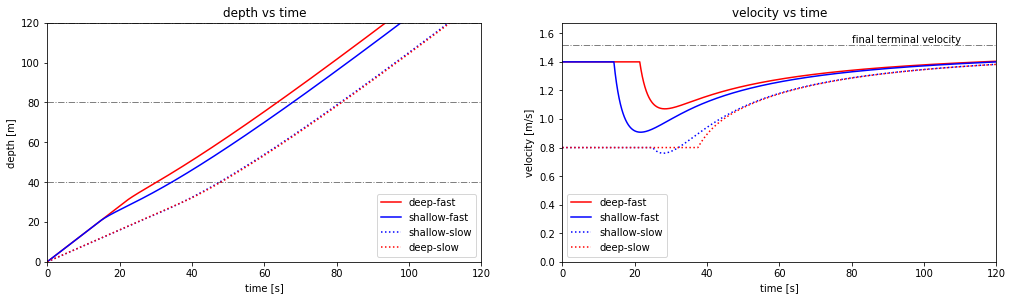

In [15]:
plot_solutions(solutions)
print_times_to_bottom(solutions, sample_depths)

#### Total dive time

The time it takes to reach 40 meters is highly variable depending on the starting depth and velocity. In the given scenarios the slowest time to reach 40m is 48s whereas the fastest is 30s which is a difference of 18s. After 40m the time difference to any depth remains constant and it is 17s to both 80m and 120m. 

In other words, the difference in dive time is explained only by what happens during the first 40m. The rest of the dive looks exactly the same in each scenario, only with more or less delay.

#### Start depth and velocity

In the given scenarios the initial velocity has a much larger impact on the difference between scenarios than the starting depth. The faster the diver reaches the freefall start depth, the more time they save. 

At higher initial velocities the starting depth also has an impact on the dive, hoever at lower initial velocities this impact is not visible. This makes sense since a diver that swims down at lower velocity will move similar to a diver that freefalls at terminal velocity.

#### Terminal velocity

In every scenario the velocity reaches terminal velocity shortly after starting the freefall. A diver with a low inital velocity will reach it faster than a diver with a high one. The higher the difference between the initial an terminal velocity is, the faster the diver will slow down after starting the freefall. 

Note that it is not possible to swim down slower than the terminal velocity, if the diver isn't actively breaking.

## Conclusions




We have seen that terminal velocity is a dominant factor during the freefall and that the starting depth and velocity don't have a significant influence on how fast a diver falls past the initial phase of the freefall. It is however possible to shorten the dive by swimming down at a higher velocity. Starting the freefall at greater depth also has an impact but to a lesser extent. The saved time remains constant after a certain depth. Therefore, the diver has to evaluate carefully if it is worth spending the extra energy to reduce the dive time.

After the initial phase the only way to influence the freefalling speed is through the reduction of drag by striving for an optimal body position and alignment and reducing laminar friction by choosing a wetsuit with a smooth surface.

There is also an indirect effect that has to be taken into consideration. The lower the falling speed, the greater the risk that the diver loses alignment during freefall. This will lead to more drag and ultimately result in a lower falling velocity if not corrected. Such a correction, however, might disturb the relaxation and focus of the diver.

Considering these effects, the following might be a good strategy: Define a minimal velocity for the freefall where the alignment during freefall is at an acceptable stability and with which the bottom can be reached in the desired time, calculate or test at which depth the terminal velocity reaches that value, and define this depth and velocity as the target to start freefalling. alternatively start freefalling a few meters earlier but with a higher initial velocity. During freefall, optimize your body position and alignment and, for minimal friction, use an adequate wetsuit.

It would be interesting to analyze real dive data to validate the model and see how well it manages to predict what is happening in actual dives of real freedivers. Another factor to consider would be the effect of wearing more or less weight during the dive. Due to time constraint this was not be done here. However, [[13]](#13) points to a GitHub repository that provides the code for this document as well as for a web app with a freefall calculator. There a link can be found to this calculator where freedivers can play around with the different parameters including variations in weight.

# References

<a id="0">[0]</a>
AIDA 2 - Freediver Course

<a id="1">[1]</a>
AIDA 3 - Advanced Freediver

<a id="2">[2]</a>
AIDA 4 - Master Freediver

<a id="3">[3]</a>
https://www.omnicalculator.com/physics/water-density

<a id="4">[4]</a> 
Naemi R, Easson WJ, Sanders RH. Hydrodynamic glide efficiency in swimming. J Sci Med Sport. 2010 Jul;13(4):444-51. doi: 10.1016/j.jsams.2009.04.009. Epub 2009 Jun 18. PMID: 19540161.

<a id="5">[5]</a> 
Barbosa TM, Morais JE, Costa MJ, Mejias JE, Marinho DA, Silva AJ. Estimating the Trunk Transverse Surface Area to Assess Swimmer's Drag Force Based on their Competitive Level. J Hum Kinet. 2012;32:9-19. doi:10.2478/v10078-012-0019-3

<a id="6">[6]</a> 
https://en.wikipedia.org/wiki/Terminal_velocity

<a id="7">[7]</a>
https://www.python.org/

<a id="8">[8]</a>
https://scipy.org/

<a id="9">[9]</a>
https://en.wikipedia.org/wiki/Archimedes%27_principle

<a id="10">[10]</a>
https://en.wikipedia.org/wiki/Boyle%27s_law

<a id="11">[11]</a>
https://bionumbers.hms.harvard.edu/bionumber.aspx?s=n&v=3&id=109718

<a id="12">[12]</a>
https://github.com/mr-pf/freefall/blob/master/freefall.ipynb

<a id="12">[13]</a>
https://github.com/mr-pf/freefall